*This notebook plots the geographic distribution of probes*
- - - 

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sqlite3
import pandas as pd
from mpl_toolkits.basemap import Basemap

In [3]:
DB_LOCATION = 'lastmile.db'

In [4]:
RA_PROBE = 'ra_probe'
RA_PROBE_API = 'ra_probe_api'
RA_ONE_OFF_EXTENSIONS = 'ra_one_off_extensions'
RA_LATENCIES_AGG = 'ra_latencies_agg'

In [5]:
SK_ONE_OFF_EXTENSIONS = 'sk_one_off_extensions'
SK_LATENCIES_AGG = 'sk_latencies_agg'
UNIT_REPORT = 'unit_report'

In [6]:
con = sqlite3.connect(DB_LOCATION)

In [7]:
query_ra = '''SELECT      agg.probeid
                        , api.latitude
                        , api.longitude

               FROM   %s                             as  agg
                    , %s                             as  api
                    , %s                             as  hardware
                    , %s                             as  ext

               WHERE     agg.probeid                  =  hardware.probeid
               AND       agg.probeid                  =  api.probeid               
               AND       agg.probeid                  =  ext.probeid

               AND       hardware.hardware_version    =  'v3'
               AND       ext.if_residential           =  1
               
               GROUP BY agg.probeid
               
            '''%(  RA_LATENCIES_AGG
                 , RA_PROBE_API
                 , RA_PROBE
                 , RA_ONE_OFF_EXTENSIONS
                )

df_ra = pd.read_sql(query_ra, con)

In [8]:
query_sk = ''' SELECT     agg.probeid
                        , unit.latitude
                        , unit.longitude
                                                                                     
               FROM       %s                            as   agg          
                        , %s                            as   ext
                        , %s                            as   unit
                        
                        

               WHERE      agg.probeid                    =    ext.probeid
               AND        agg.probeid                    =    unit.unit_id                     
               
               AND        ext.if_residential             =    1
               AND        agg.h1_avg                     <>   0
               AND        agg.h2_avg                     <>   0
               
               GROUP BY agg.probeid
               
           '''%(   SK_LATENCIES_AGG
                 , SK_ONE_OFF_EXTENSIONS
                 , UNIT_REPORT                
               )

df_sk = pd.read_sql(query_sk, con)

In [9]:
df_ra = df_ra.dropna()

In [10]:
df_sk = df_sk.dropna()

In [11]:
df_ra.count()

probeid      696
latitude     696
longitude    696
dtype: int64

In [12]:
df_ra.head()

,probeid,latitude,longitude
0,10006,52.3805,4.9275
1,10007,38.3205,-122.3225
2,10010,52.3475,4.9175
3,10012,52.3685,4.8975
4,10013,52.3685,5.2175


In [13]:
df_sk.count()

probeid      1244
latitude     1244
longitude    1244
dtype: int64

In [14]:
df_sk.head()

,probeid,latitude,longitude
0,14905,55.9500,-3.2000
1,14971,55.9500,-3.2000
2,15015,53.3667,-1.5000
3,15058,50.7167,-1.8833
4,15129,51.5000,-0.1300


In [15]:
def probes_in_region(df, llcrnrlat, llcrnrlon, urcrnrlat, urcrnrlon):
    count = 0
    for x,y in zip (df['latitude'].values, df['longitude'].values):
        if (x > llcrnrlat and y > llcrnrlon and x < urcrnrlat and y < urcrnrlon):
            count+=1
    return count

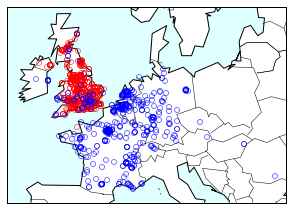

In [16]:
#---- plt.style.use('ggplot')
fig = plt.figure(figsize=(5,5))
plt.rcParams['font.size'] = 22

llcrnrlat     =    +41.61900  
llcrnrlon     =    -12.04945
urcrnrlat     =    +59.11639              
urcrnrlon     =    +27.67711

m = Basemap (  projection    =    'merc'
             
             , llcrnrlat     =    llcrnrlat
             , llcrnrlon     =    llcrnrlon
             
             , urcrnrlat     =    urcrnrlat         
             , urcrnrlon     =    urcrnrlon
             
             , lat_ts        =    20
             , resolution    =    'c'
            )

m.drawcoastlines()
m.fillcontinents(color='white',lake_color='lightcyan')
#m.fillcontinents()
#m.drawparallels(np.arange(-90.,91.,30.))
#m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='lightcyan')
m.drawcountries()

count = probes_in_region(df_ra, llcrnrlat, llcrnrlon, urcrnrlat, urcrnrlon )

#plt.title("RIPE Atlas (EU) [#%d]"%count, fontsize=32, y=1.02)

#plt.text(  0,0
#         , "RIPE Atlas (EU) [#%d]"%count 
#         , horizontalalignment='right'
#         , verticalalignment='bottom'
#         , rotation='vertical'
#         , fontsize=22)

x,y = m(df_sk['longitude'].values, df_sk['latitude'].values)
m.plot(x, y, 'r.', markersize=10, fillstyle='none')

x,y = m(df_ra['longitude'].values, df_ra['latitude'].values)
m.plot(x, y, 'b.', markersize=10, fillstyle='none')

plt.savefig('probes-geo-distribution-eu.pdf', format='pdf', bbox_inches='tight')

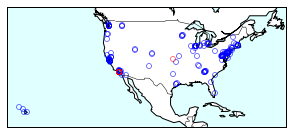

In [17]:
#---- plt.style.use('ggplot')
fig = plt.figure(figsize=(5,5))
plt.rcParams['font.size'] = 22

llcrnrlat     =    +14.04529  
llcrnrlon     =    -162.82032
urcrnrlat     =    +52.55921 
urcrnrlon     =    -51.90235 

m = Basemap (  projection    =    'merc'
             
             , llcrnrlat     =    +14.04529  
             , llcrnrlon     =    -162.82032
             
             , urcrnrlat     =    +52.55921 
             , urcrnrlon     =    -51.90235 
             
             , lat_ts        =    20
             , resolution    =    'c'
            )

m.drawcoastlines()
m.fillcontinents(color='white',lake_color='lightcyan')
#m.fillcontinents()
#m.drawparallels(np.arange(-90.,91.,30.))
#m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='lightcyan')
m.drawcountries()

ra_count = probes_in_region(df_ra, llcrnrlat, llcrnrlon, urcrnrlat, urcrnrlon )
sk_count = probes_in_region(df_sk, llcrnrlat, llcrnrlon, urcrnrlat, urcrnrlon )

#plt.title("RIPE Atlas [#%d] | SamKnows [#%d] (US)"%(ra_count, sk_count)
#          , fontsize=42
#          , y=-0.12
#        )

#plt.text(  0,0
#         , "RIPE Atlas [#%d]\nSamKnows [#%d] (US)"%(ra_count, sk_count)
#         , horizontalalignment='right'
#         , verticalalignment='bottom'
#         , rotation='vertical'
#         , fontsize=22)

x,y = m(df_ra['longitude'].values, df_ra['latitude'].values)
m.plot(x, y, 'b.', markersize=10, fillstyle='none')

x,y = m(df_sk['longitude'].values, df_sk['latitude'].values)
m.plot(x, y, 'r.', markersize=10, fillstyle='none')

plt.savefig('probes-geo-distribution-us.pdf', format='pdf', bbox_inches='tight')